In [1]:
# Final Term Project
# Credit Card Fraud Detection
# Author: Saurabh Biswas
# DSC550 T302

Credit card fraud is one of the major concerns among financial institutions since the introduction of card-based payments. There are various classification and prediction models available in machine learning world that we can use to detect fraud. 
The aim of this project is to compare different classification techniques for fraud detcetion and find a suitable model that can be used to detect fraud.

Data Source: As most of the credit card transactions contain personal sensitive data, credit card processing companies don’t readily make it available in the open market. I’m planning to use a dataset available in Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, average_precision_score, auc, precision_recall_curve, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
import pandas_profiling as pp
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
%matplotlib inline
seed = 824

/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read file and load into a dataframe
df1 = pd.read_csv('creditcard.csv')
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


This dataset contains 284807 number of observations and 30 independent & one dependent variable. Variables V1 through V28 are the PCA transformed values. This is to keep the financial data confidential. Only 'Time' and 'Amount' are the only independent attributes that are in its original form. 'Class' is the dependent variable which is nothing but the claasification of the transaction - fraud (Class = 1) or no fraud (Class = 1).

In [5]:
x_class = df1['Class'].value_counts()
print(x_class)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
print('Fraudulent transactions are: {0:.2f} %'.format((x_class[1]/len(df1))*100))
print('Non Fraudulent transactions are: {0:.2f} %'.format((x_class[0]/len(df1))*100))

Fraudulent transactions are: 0.17 %
Non Fraudulent transactions are: 99.83 %


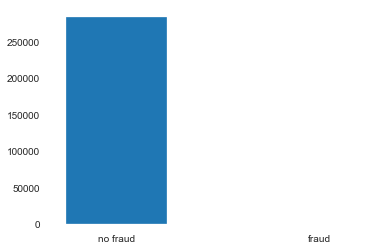

In [7]:
plt.bar(x=['no fraud', 'fraud'], height = x_class, width = 0.5)
plt.show()

We can see that the dataset is highly imbalanced. If we build a model that predicts tansactions as non fraudulent, then also the accuracy of the model will be 99.83%. But still financial institution will incur loss due to fraud.

In [8]:
total = df1.isnull().sum().sort_values(ascending = False)
pd.concat([total], axis=1, keys=['Total']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


No Null/NaN values in any of the variable.

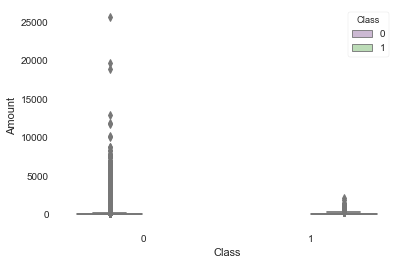

In [9]:
# Amount v/s Class
fig, ax1 = plt.subplots(ncols=1)
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df1, palette="PRGn",showfliers=True)
plt.show()

Based on the above plot, it looks like fraudulent transactions are of lower amount.

We will split our data into training set and test set in 3:1 ratio. We will use training set for training our models and test set to test our best model.

In [10]:
# Train Test Split
X = df1.drop('Class', axis=1)  # get only independent variables
y = df1['Class']  # get Class variable

#y = df1.loc[:, ['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=seed)

#y_train1= y_train[y_train[:] == 1]   # fraud class
#y_test1= y_test[y_test[:] == 1]   # non fraud class
#print (len(y_train1))
#print (len(y_test1))

In [39]:
#pp.ProfileReport(X_train).to_notebook_iframe()

We will now scale Time and Amount.

In [11]:
corr_list =[]
for i in range(X_train.shape[1]):
    corr=stats.pearsonr(X_train.iloc[:,i], y_train[:])[0]
#    corr=stats.pearsonr(X_train.iloc[:,i], y_train.iloc[:,0])[0]
    corr_list.append(corr)
    col = X_train.columns[i]
    print('Correlation of {cols} is: {0:.2f}'.format(corr, cols = col))

Correlation of Time is: -0.01
Correlation of V1 is: -0.10
Correlation of V2 is: 0.09
Correlation of V3 is: -0.19
Correlation of V4 is: 0.13
Correlation of V5 is: -0.09
Correlation of V6 is: -0.04
Correlation of V7 is: -0.18
Correlation of V8 is: 0.02
Correlation of V9 is: -0.10
Correlation of V10 is: -0.21
Correlation of V11 is: 0.15
Correlation of V12 is: -0.25
Correlation of V13 is: -0.01
Correlation of V14 is: -0.30
Correlation of V15 is: -0.00
Correlation of V16 is: -0.19
Correlation of V17 is: -0.31
Correlation of V18 is: -0.10
Correlation of V19 is: 0.03
Correlation of V20 is: 0.02
Correlation of V21 is: 0.04
Correlation of V22 is: -0.00
Correlation of V23 is: -0.00
Correlation of V24 is: -0.01
Correlation of V25 is: 0.01
Correlation of V26 is: 0.01
Correlation of V27 is: 0.02
Correlation of V28 is: 0.01
Correlation of Amount is: 0.00


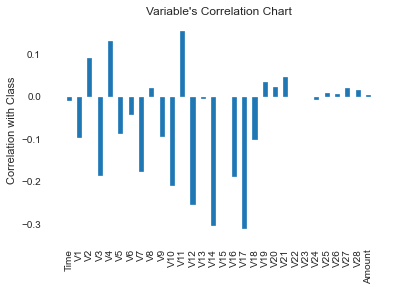

In [12]:
plt.bar(x=X_train.columns, height = corr_list, width = 0.5)
plt.xticks(rotation =90)
plt.ylabel('Correlation with Class')
plt.title("Variable's Correlation Chart")
plt.show()

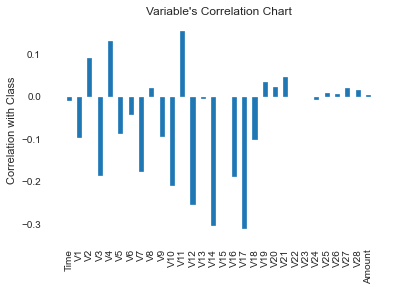

In [13]:
plt.bar(x=X_train.columns, height = corr_list, width = 0.5)
plt.xticks(rotation =90)
plt.ylabel('Correlation with Class')
plt.title("Variable's Correlation Chart")
plt.show()

Based on the above chart, V17, V14, V12, V10 are negatively correlated with fraud and V11, V4, V2, V21 are positively correlated with fraud. None of the variables have high correlation (> 0.8) with Class variable. So it won't cause any multicollinearity.

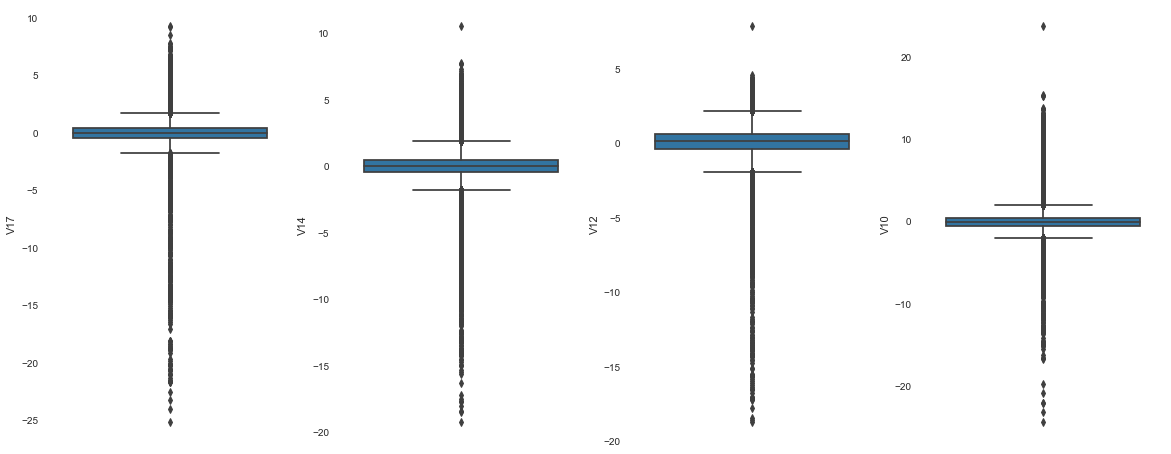

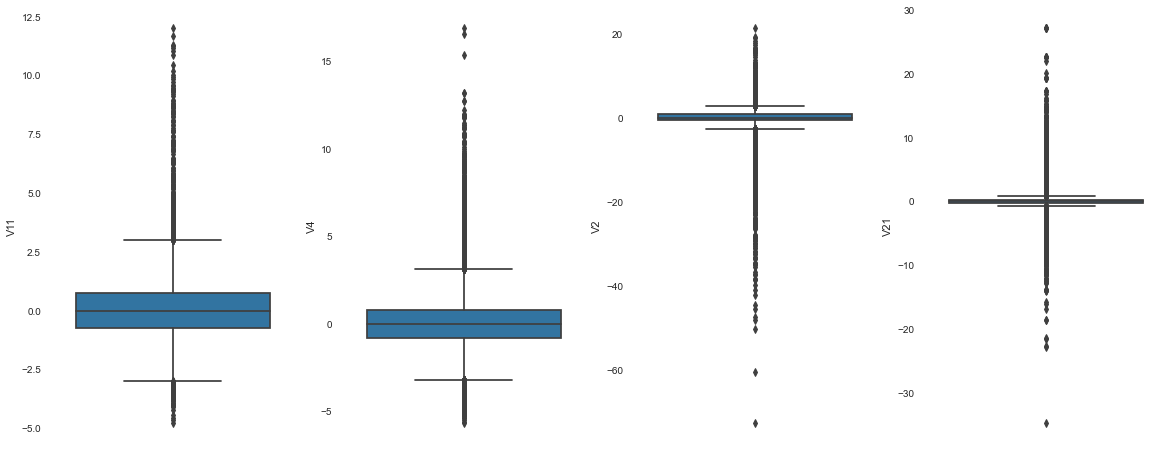

In [14]:
# boxplots to show the outliers - if any
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,8))
s = sns.boxplot(ax = ax1, y="V17",data=X_train)
s = sns.boxplot(ax = ax2, y="V14",data=X_train)
s = sns.boxplot(ax = ax3, y="V12",data=X_train)
s = sns.boxplot(ax = ax4, y="V10",data=X_train)
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,8))
s = sns.boxplot(ax = ax1, y="V11",data=X_train)
s = sns.boxplot(ax = ax2, y="V4",data=X_train)
s = sns.boxplot(ax = ax3, y="V2",data=X_train)
s = sns.boxplot(ax = ax4, y="V21",data=X_train)
plt.show()

V14, V12, V10, V2 & V21 have outliers. We need to remove these outliers.

In [15]:
temp_df = pd.concat([X_train, y_train], axis=1, sort=False)  # concatenate both X and y to remove outliers
temp_df1= temp_df[temp_df.Class == 1]   # fraud class
temp_df0= temp_df[temp_df.Class == 0]   # non fraud class

We will now remove outliers from each type of Classes separately

In [16]:
# prior to removing fraud class outlier
temp_df1.shape

(369, 31)

In [17]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_V14 = stats.zscore(temp_df1.V14) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V14) < 3)] # drop rows with zscore > 3 or < -3

zscore_V12 = stats.zscore(temp_df1.V12) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V12) < 3)] # drop rows with zscore > 3 or < -3

zscore_V10 = stats.zscore(temp_df1.V10) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V10) < 3)] # drop rows with zscore > 3 or < -3

zscore_V2 = stats.zscore(temp_df1.V2) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V2) < 3)] # drop rows with zscore > 3 or < -3

zscore_V21 = stats.zscore(temp_df1.V21) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V21) < 3)] # drop rows with zscore > 3 or < -3

zscore_Amount = stats.zscore(temp_df1.Amount) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_Amount) < 3)] # drop rows with zscore > 3 or < -3

# after removing fraud class outlier
temp_df1.shape

(342, 31)

In [18]:
# prior to removing non fraud class outlier 
temp_df0.shape

(213236, 31)

In [19]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_V14 = stats.zscore(temp_df0.V14) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V14) < 3)] # drop rows with zscore > 3 or < -3

zscore_V12 = stats.zscore(temp_df0.V12) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V12) < 3)] # drop rows with zscore > 3 or < -3

zscore_V10 = stats.zscore(temp_df0.V10) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V10) < 3)] # drop rows with zscore > 3 or < -3

zscore_V2 = stats.zscore(temp_df0.V2) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V2) < 3)] # drop rows with zscore > 3 or < -3

zscore_V21 = stats.zscore(temp_df0.V21) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V21) < 3)] # drop rows with zscore > 3 or < -3

zscore_Amount = stats.zscore(temp_df0.Amount) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_Amount) < 3)] # drop rows with zscore > 3 or < -3

# after removing non fraud class outlier
temp_df0.shape

(194702, 31)

In [20]:
temp_df = pd.concat([temp_df1, temp_df0], axis=0, sort=False)  # concatenate both Classes
temp_df.shape

(195044, 31)

In [21]:
# get X_train and y_train data after removing outlier
X_train = temp_df.drop('Class', axis=1)  # get only independent variables
#y_train = temp_df.loc[:,['Class']]  # get Class variable
y_train = temp_df['Class']
#y_train.astype('category')

Our data is now clean and ready for model building and training.

We will use GridSearchCV to find the best parms for each model. We will use average precision score because our dataset is highly imbalanced and it returns a score instead of a class unlike f1 score. We will use cross validation number as 5, n_jobs as -1 to provide maximum CPU to training the model.

Finally, we will select the best model based on best_score returned by GridSearchCV.

In [22]:
col_transformer = ColumnTransformer(
                    transformers=[
                        ('rs', RobustScaler(), ['Amount', 
                                                  'Time']),
                    ],
                    remainder='passthrough')

In [26]:

#rf_pipeline = Pipeline([('rbscaler', RobustScaler()),
#                        ('rf', RandomForestClassifier(random_state=seed, n_jobs=-1))])

rf_pipeline = Pipeline([('preprocessing', col_transformer),
                        ('rf', RandomForestClassifier(random_state=seed, n_jobs=-1))])
params = {'rf__n_estimators': [50, 75, 100],
          'rf__max_depth': [4, 6, 8],
          'rf__max_features': ['sqrt', 'log2'],
          'rf__class_weight': ['balanced', None]}
rf_grid = GridSearchCV(rf_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')
        

params = {'rf__n_estimators': [50, 75, 100],
          'rf__max_depth': [4, 6, 8],
          'rf__max_features': ['sqrt', 'log2'],
          'rf__class_weight': ['balanced', None]}
rf_grid = GridSearchCV(rf_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')
        


In [27]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('rs',
                                                                         RobustScaler(copy=True,
                                                                                      quantile_range=(25.0,
                                                                                                      75.0),
                                                                                      with_centering=True,
                            

In [28]:
rf_grid = joblib.load('rf_model.sav')

In [29]:
rf_grid.cv_results_

{'mean_fit_time': array([ 30.79300904,  40.59356446,  51.1444561 ,  24.03172803,
         33.74767427,  44.10732908,  42.09363947,  59.39905324,
         76.33606257,  36.08658371,  47.94124579,  62.06531987,
         51.10293798,  72.57173705,  93.96248889,  42.70417228,
         57.5960115 ,  75.03699269,  30.90245819,  40.85639777,
         52.42517581,  25.48309574,  34.26349907,  44.20383415,
         42.95853519,  60.10498261,  75.98009162,  35.64969606,
         49.17821121, 125.23802567, 168.29061379, 816.25100698,
        775.09456053, 308.21680789,  56.92937322,  51.06654615]),
 'std_fit_time': array([4.50381494e-01, 3.20870098e-01, 8.04983967e-01, 7.29765653e-01,
        3.69774200e-01, 2.54964353e-01, 4.55051924e-01, 9.02423227e-01,
        5.27759017e-01, 9.18384995e-01, 5.16754245e-01, 7.58018882e-01,
        1.07735486e+00, 1.13352772e+00, 1.09868235e+00, 1.19877729e+00,
        7.01716481e-01, 3.67686207e-01, 2.66198389e-01, 2.46545356e-01,
        5.64813012e-01, 1.315

In [30]:
rf_grid.best_score_, rf_grid.best_params_


(0.8784893202350404,
 {'rf__class_weight': None,
  'rf__max_depth': 6,
  'rf__max_features': 'sqrt',
  'rf__n_estimators': 75})

In [31]:
rf_file = 'rf_model.sav'  # file name to store RF model
joblib.dump(rf_grid, rf_file)  # stores the model

['rf_model.sav']

In [32]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

predictions = rf_grid.predict_proba(X_train)[:, 1]
binned_true_p, binned_predict_p = calibration_curve(y_train, predictions, n_bins=10)

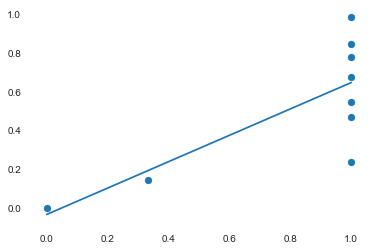

In [33]:
plt.scatter(binned_true_p, binned_predict_p)
m, b = np.polyfit(binned_true_p, binned_predict_p, 1)
plt.plot(binned_true_p, m*binned_true_p + b)
plt.show()

In [34]:
#calibrated_rf_grid = CalibratedClassifierCV(rf_grid, cv=5, method='isotonic')
# Note we need to refit!
#calibrated_rf_grid.fit(X_train, y_train);

#rfc_file = 'rfc_model.sav'  # file name to store RF model
#joblib.dump(calibrated_rf_grid, rfc_file)  # stores the model

In [37]:
lr_pipeline = Pipeline([('preprocessing', col_transformer),
                        ('select_best', SelectKBest()),
                        ('logistic', LogisticRegression(class_weight='balanced', random_state=seed))])

In [38]:
params = {'logistic__C': [0.1, 1.0, 10.0],
          'select_best__k': [3,5,7,9,'all']}
lr_grid = GridSearchCV(lr_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [39]:
lr_grid.fit(X_train, y_train)
lr_file = 'lr_model.sav'  # file name to store LR model
joblib.dump(lr_grid, lr_file)  # stores the model

/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['lr_model.sav']

In [40]:
lr_grid.cv_results_

{'mean_fit_time': array([ 1.91638603,  2.41345167,  2.19800081,  2.52693205, 14.0557898 ,
         1.15588193,  1.45459895,  1.73614216,  2.26927519, 16.84380975,
         1.08928103,  1.31509795,  1.56511192,  2.16356063, 12.19531174]),
 'std_fit_time': array([0.29812788, 0.07213114, 0.36651596, 0.03991664, 1.21481122,
        0.03681557, 0.0390448 , 0.05766578, 0.06652325, 0.90958903,
        0.02775591, 0.06383619, 0.09388511, 0.08684622, 1.11324889]),
 'mean_score_time': array([0.12890239, 0.11358757, 0.11952839, 0.08225312, 0.13348823,
        0.09446073, 0.09659929, 0.10469785, 0.08486919, 0.10122461,
        0.08141484, 0.08435698, 0.08828464, 0.07975368, 0.05982895]),
 'std_score_time': array([0.03380771, 0.01524689, 0.0471573 , 0.00501694, 0.01200993,
        0.00805603, 0.00664738, 0.00880897, 0.00753705, 0.01721951,
        0.00717898, 0.00720625, 0.01911823, 0.00835909, 0.00748787]),
 'param_logistic__C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [41]:
lr_grid.best_score_, lr_grid.best_params_

(0.8783642378974911, {'logistic__C': 0.1, 'select_best__k': 'all'})

In [23]:
ann_pipeline = Pipeline([('preprocessing', col_transformer),
                        ('ANN', MLPClassifier(random_state=seed))])

In [24]:
params = [{'ANN__solver': ['lbfgs'],
           'ANN__max_iter': [50, 100, 150]},
          {'ANN__solver': ['sgd'],
           'ANN__max_iter': [50, 100, 150],
           'ANN__learning_rate_init': [0.001,0.01,1]},
          {'ANN__solver': ['adam'],
           'ANN__max_iter': [50, 100, 150],
           'ANN__learning_rate_init': [0.001,0.01,1]}]

ann_grid = GridSearchCV(ann_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [25]:
ann_grid.fit(X_train, y_train)
ann_file = 'ann_model.sav'  # file name to store svc model
joblib.dump(ann_grid, ann_file)  # stores the model

['ann_model.sav']

In [26]:
ann_grid.cv_results_

{'mean_fit_time': array([ 19.720542  ,  19.07684383,  14.61861291,  33.18615251,
         33.01116056,  30.80669761,  19.81193061,  18.89290032,
         17.91662765,  26.75319319,  26.33137827,  26.5223031 ,
         19.44666018,  19.39439373,  19.19012008,  41.75160465,
         41.0560842 ,  38.56762748, 122.69924774, 136.8793241 ,
        117.19533548]),
 'std_fit_time': array([ 2.78403859,  1.88836668,  4.27993557,  0.46788641,  0.37588296,
         1.42958549,  0.55539358,  0.81638594,  0.51549438,  5.33204203,
         5.47928269,  5.60014881,  3.42151948,  3.54441117,  3.55613037,
        16.6696927 , 16.83905942, 16.76766107,  2.02026528, 10.55889227,
        15.41801104]),
 'mean_score_time': array([0.45295105, 0.51981945, 0.37791433, 0.34578977, 0.32415295,
        0.27651911, 0.20683637, 0.23266368, 0.20385637, 0.22297506,
        0.20070739, 0.20438242, 0.21991653, 0.21575127, 0.21155219,
        0.92124982, 0.90720644, 0.97593336, 1.24585414, 0.70987306,
        0.5517397

In [27]:
ann_grid.best_score_, ann_grid.best_params_

(0.875959321115172,
 {'ANN__learning_rate_init': 0.01, 'ANN__max_iter': 50, 'ANN__solver': 'sgd'})

In [23]:
#lr_grid = joblib.load('lr_model.sav')

In [25]:
# get f1 matrix after predicting the test set
y_pred = lr_grid.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
print('f1 score:', f1_score(y_test, y_pred,average='weighted'))

              precision    recall  f1-score   support

     class 0       1.00      0.95      0.97     71079
     class 1       0.03      0.95      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.95      0.51     71202
weighted avg       1.00      0.95      0.97     71202

f1 score: 0.9704962602531955


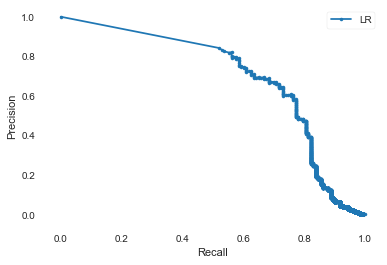

In [38]:
# plot precision recall curve
# predict probabilities
yhat = lr_grid.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='LR')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [27]:


average_precision = average_precision_score(y_test, pos_probs)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.66


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[67223,  3856],
       [    6,   117]])

Train the best model on the whole dataset

In [29]:
temp_df1= df1[df1.Class == 1]   # fraud class
temp_df0= df1[df1.Class == 0]   # non fraud class

In [30]:
temp_df1.shape

(492, 31)

In [31]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_V14 = stats.zscore(temp_df1.V14) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V14) < 3)] # drop rows with zscore > 3 or < -3

zscore_V12 = stats.zscore(temp_df1.V12) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V12) < 3)] # drop rows with zscore > 3 or < -3

zscore_V10 = stats.zscore(temp_df1.V10) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V10) < 3)] # drop rows with zscore > 3 or < -3

zscore_V2 = stats.zscore(temp_df1.V2) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V2) < 3)] # drop rows with zscore > 3 or < -3

zscore_V21 = stats.zscore(temp_df1.V21) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_V21) < 3)] # drop rows with zscore > 3 or < -3

zscore_Amount = stats.zscore(temp_df1.Amount) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_Amount) < 3)] # drop rows with zscore > 3 or < -3

temp_df1.shape

(459, 31)

In [32]:
temp_df0.shape

(284315, 31)

In [33]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_V14 = stats.zscore(temp_df0.V14) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V14) < 3)] # drop rows with zscore > 3 or < -3

zscore_V12 = stats.zscore(temp_df0.V12) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V12) < 3)] # drop rows with zscore > 3 or < -3

zscore_V10 = stats.zscore(temp_df0.V10) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V10) < 3)] # drop rows with zscore > 3 or < -3

zscore_V2 = stats.zscore(temp_df0.V2) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V2) < 3)] # drop rows with zscore > 3 or < -3

zscore_V21 = stats.zscore(temp_df0.V21) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_V21) < 3)] # drop rows with zscore > 3 or < -3

zscore_Amount = stats.zscore(temp_df0.Amount) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_Amount) < 3)] # drop rows with zscore > 3 or < -3

temp_df0.shape

(259600, 31)

In [34]:
temp_df = pd.concat([temp_df1, temp_df0], axis=0, sort=False)  # concatenate both Classes
temp_df.shape

(260059, 31)

In [35]:
# get X_train and y_train data after removing outlier
X = temp_df.drop('Class', axis=1)  # get only independent variables
#y_train = temp_df.loc[:,['Class']]  # get Class variable
y = temp_df['Class']
#y_train.astype('category'

In [36]:
best_model = Pipeline([('preprocessing', col_transformer),
                        ('select_best', SelectKBest(k='all')),
                        ('logistic', LogisticRegression(class_weight='balanced', random_state=seed, C = 0.1))])

In [37]:
best_model.fit(X, y)
best_file = 'best_model.sav'  # file name to store svc model
joblib.dump(best_model, best_file)  # stores the model

/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['best_model.sav']